In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

import warnings            
warnings.filterwarnings("ignore") 


The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

In [2]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData[:30]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis B',
       'Measles', ' BMI ', 'under_five deaths ', 'Polio', 'Total_Expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness_1-19 years', ' thinness_5-9 years',
       'Income_composition_of_resources', 'Schooling' ]

In [6]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total_Expenditure                  0.076923
Alcohol                            0.066031
Income_composition_of_resources    0.056841
Schooling                          0.055480
 BMI                               0.011572
 thinness_1-19 years               0.011572
 thinness_5-9 years                0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult_Mortality                    0.003404
Life_Expectancy                    0.003404
Name: bos_yuzde, dtype: float64

In [7]:
fill_list = (bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]).index

In [8]:
fill_list

Index(['Population', 'Hepatitis B', 'GDP', 'Total_Expenditure', 'Alcohol',
       'Income_composition_of_resources', 'Schooling', ' BMI ',
       ' thinness_1-19 years', ' thinness_5-9 years', 'Diphtheria', 'Polio',
       'Adult_Mortality', 'Life_Expectancy'],
      dtype='object')

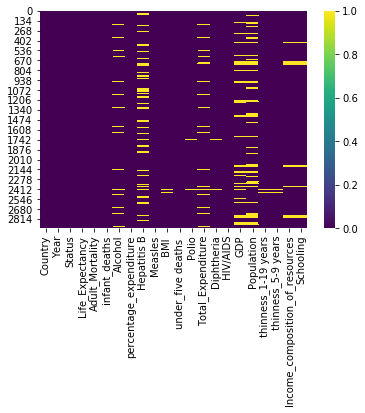

In [9]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

bolgeye gore interpolate ile doldurma 

In [10]:
LifeExpectancyData['Life_Expectancy'].isna().sum()

10

In [11]:
LifeExpectancyData.cumsum(skipna=False).head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65,263,62,0.01,71.2796,65,1154,...,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
1,AfghanistanAfghanistan,4029,DevelopingDeveloping,124.9,534,126,0.02,144.803,127,1646,...,64,16.34,127,0.2,1196.96,3.40641e+07,34.7,34.8,0.955,20.1
2,AfghanistanAfghanistanAfghanistan,6042,DevelopingDevelopingDeveloping,184.8,802,192,0.03,218.022,191,2076,...,126,24.47,191,0.3,1828.7,6.57958e+07,52.4,52.5,1.425,30
3,AfghanistanAfghanistanAfghanistanAfghanistan,8054,DevelopingDevelopingDevelopingDeveloping,244.3,1074,261,0.04,296.207,258,4863,...,193,32.99,258,0.4,2498.66,6.94927e+07,70.3,70.5,1.888,39.8
4,AfghanistanAfghanistanAfghanistanAfghanistanAf...,10065,DevelopingDevelopingDevelopingDevelopingDevelo...,303.5,1349,332,0.05,303.304,326,7876,...,261,40.86,326,0.5,2562.2,7.24713e+07,88.5,88.7,2.342,49.3


In [12]:
LifeExpectancyData.notna().sum()

Country                            2938
Year                               2938
Status                             2938
Life_Expectancy                    2928
Adult_Mortality                    2928
infant_deaths                      2938
Alcohol                            2744
percentage_expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under_five deaths                  2938
Polio                              2919
Total_Expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness_1-19 years               2904
 thinness_5-9 years                2904
Income_composition_of_resources    2771
Schooling                          2775
dtype: int64

In [13]:
#NEDEN OLMADI

LifeExpectancyData_filled.cumprod(skipna=False) 

NameError: name 'LifeExpectancyData_filled' is not defined

In [ ]:
LifeExpectancyData.fillna(0).head()

In [ ]:
LifeExpectancyData.fillna(method='pad').head()

In [ ]:
for col in fill_list: 
    LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'bfill')) 

In [ ]:
LifeExpectancyData.fillna(method='ffill')

In [ ]:
LifeExpectancyData.isnull().sum()

In [ ]:
#SOR

LifeExpectancyData.interpolate(method='values').head()

In [ ]:
## SOR 

LifeExpectancyData.prod()

In [ ]:
LifeExpectancyData_filled = LifeExpectancyData.copy() 

In [ ]:
for col in fill_list: 
    LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.interpolate(limit_direction='both')) 

In [ ]:
fillna(method = 'ffill')

In [ ]:
for col in fill_list: 
    LifeExpectancyData_filled[col]=LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'ffill'))  

In [ ]:
for col in fill_list: 
    LifeExpectancyData_filled[col]=LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'bfill'))


In [ ]:
for col in fill_list: 
    LifeExpectancyData_filled[col].fillna(LifeExpectancyData_filled.groupby(by = 'Country').mean()[col], inplace= True)

In [ ]:
LifeExpectancyData_filled.isnull().sum()

In [ ]:
sns.heatmap(LifeExpectancyData.isnull(), yticklabels= False, cmap='viridis', cbar=True)

A quick look at correlations between variables

In [ ]:
LifeExpectancyData_num_na= LifeExpectancyData._get_numeric_data() 

In [ ]:
LifeExpectancyData.shape

In [ ]:
LifeExpectancyData_num_na.shape

In [ ]:
LifeExpectancyData_num_na.columns

In [ ]:
corr_list = LifeExpectancyData_num_na.corr().Life_Expectancy.abs().sort_values(ascending = False).index[1:] 

In [ ]:
corr_matrix = LifeExpectancyData_num_na.corr()

corr_matrix.Life_Expectancy.abs().sort_values(ascending = False)[1:] 

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, linewidths=.2, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (LifeExpentacy)")